<a href="https://colab.research.google.com/github/leeCodingStudio/Python_NLP/blob/master/5_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 1. 네이버 영화 리뷰 데이터셋
* 총 200,000개의 리뷰로 구성된 데이터로, 영화 리뷰를 긍/부정으로 분류하기 위해 만들어진 데이터셋
* 리뷰가 긍정인 경우 1, 부정인 경우 0으로 표시한 레이블로 구성되어 있음

In [2]:
import urllib.request
import pandas as pd

In [3]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', filename='ratings_train.txt')
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt', filename='ratings_test.txt')

('ratings_test.txt', <http.client.HTTPMessage at 0x7fbb4a3df910>)

In [4]:
train_dataset = pd.read_table('ratings_test.txt')
train_dataset

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [5]:
len(train_dataset)

50000

# 2. 데이터 전처리

In [6]:
# 결측치를 확인하고 결측치를 제거
train_dataset.replace('', float('NaN'), inplace=True)
train_dataset.isna().values.any()

True

In [7]:
train_dataset = train_dataset.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(train_dataset)}')

필터링된 데이터셋 총 개수: 49997


In [8]:
# 열을 기준으로 중복 데이터를 제거
train_dataset = train_dataset.drop_duplicates(['document']).reset_index(drop=True)
train_dataset

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49154,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [9]:
# 한글이 아닌 문자를 포함하는 데이터 제거(ㅋㅋㅋ 제거하지 않음)
train_dataset['document'] = train_dataset['document'].str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ')
train_dataset

<ipython-input-9-b262a54e4337>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_dataset['document'] = train_dataset['document'].str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣ]', ' ')


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49152,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49154,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49155,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [10]:
# 너무 짧은 단어를 제거(단어의 길이가 한글자인 단어만 제거)
train_dataset['document'] = train_dataset['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
train_dataset

,id,document,label
0,6270596,,1
1,9274899,,0
2,8544678,평점들은 나쁘진 않지만 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 막장임 돈주고 보기에는,0
4,6723715,아니었어도 줬을텐데 나와서 심기를 불편하게,0
...,...,...,...
49152,4608761,오랜만에 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49153,5308387,박약들이나 하는거다 탈영은 주인공 김대희 닮았고 이등병,0
49154,9072549,그림도 완성도도 높았지만 불안하게 만든다,0
49155,5802125,봐서는 재미도 기분만 잡치고 세트장에서 해먹네,0


In [11]:
# 전체 길이가 10이하이거나 전체 단어 개수가 5개 이하인 데이터를 제거
train_dataset = train_dataset[train_dataset.document.apply(lambda x: len(str(x)) > 60 and len(str(x).split()) > 5)].reset_index(drop=True)
train_dataset

,id,document,label
0,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 말도안되는 무기에 유치한 그립다...,0
1,6900881,청춘은 아름답다 아름다움은 이성을 흔들어 놓는다 찰나의 아름다움을 포착한 섬세하고 ...,1
2,9305768,금요일 나이트메어 시리즈와 시리즈를 양산해냈던 헬레이저 시리즈의 작가의 상상력이 돋...,1
3,9985937,ㅋㅋㅋ 난생처음 로그인하고 평점남기네요 개빡쳐서 알바들 속지마세요 ㅐ같은 시간낭비가...,0
4,7789587,마음이 을보신분들은 이해하시겟지만 는망장입니다 졸작이죠 솔직히말해선 그이유는 예를들...,0
...,...,...,...
4327,10005475,색채를 공포에 잘시킨 작품이 아닐런지 후속작은 아니지만 괴상하게 서스페리아 딥레드도...,1
4328,6768137,재미최고입니다 질질짜는 스토리뻔한거 질리는더 드라마 좋아요 안보는데 챙겨봅니다 직장...,1
4329,8787645,감독은 만약에 만든다 편까진 복습하고 오시길 뭡니까 액션도 통쾌하지가 않았음 편까지...,1
4330,6694209,그래서 연출만 잘했더라면 흥미로웠을텐데 몇가지 기발한 발상이 있었으나 못살림 영화의...,0


In [12]:
!pip install konlpy

In [13]:
from konlpy.tag import Okt

In [14]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [15]:
train_dataset = list(train_dataset['document'])
# train_dataset

In [16]:
okt = Okt()

tokenized_data = []

for sentence in train_dataset:
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

In [17]:
tokenized_data[0]

['갈수록',
 '개판',
 '되다',
 '중국영화',
 '유치하다',
 '내용',
 '없다',
 '폼',
 '잡다',
 '말',
 '안되다',
 '무기',
 '유치하다',
 '그리다',
 '동사서독',
 '같다',
 '영화',
 '류',
 '아',
 '류작',
 '이다']

In [18]:
import matplotlib.pyplot as plt

리뷰의 최대 길이:  64
리뷰의 최대 길이:  27.016389658356417


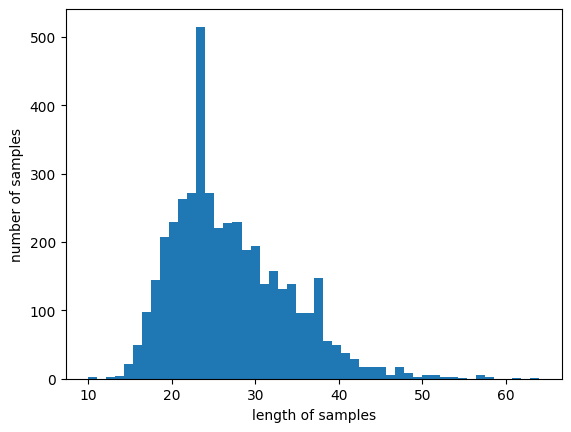

In [19]:
print('리뷰의 최대 길이: ', max(len(review) for review in tokenized_data))
print('리뷰의 최대 길이: ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
# matplotlib hist함수로 length of samples와 number of samples를 표현
# 리뷰의 최대 길이와 평균길이를 출

# 3. 워드 임베딩 구축

In [21]:
from gensim.models import Word2Vec

In [22]:
embedding_dim = 100

# sg: 0(CBOW), 1(Skip-gram)
model = Word2Vec(
    sentences = tokenized_data,
    vector_size = embedding_dim,
    window = 5,
    min_count = 5,
    workers = 4,
    sg=0
)

In [23]:
# 임베딩 행렬의 크기
# 단어 사전에는 총 12107개의 단어가 존재하고, 각각의 단어는 미리 설정한 embedding_dim=100 차원으로 구
model.wv.vectors.shape

(3137, 100)

In [24]:
word_vectors = model.wv
vocabs = list(word_vectors.index_to_key)
vocabs[:20]

['영화',
 '보다',
 '을',
 '이다',
 '있다',
 '적',
 '로',
 '없다',
 '되다',
 '에서',
 '아니다',
 '같다',
 '생각',
 '만',
 '좋다',
 '사람',
 '인',
 '다',
 '나오다',
 '않다']

In [25]:
for sim_word in model.wv.most_similar('영화'):
    print(sim_word)

('쓰레기', 0.9988924264907837)
('생각', 0.998863935470581)
('걸', 0.998824954032898)
('중', 0.9988091588020325)
('재미없다', 0.99880450963974)
('최악', 0.9987186193466187)
('최고', 0.998712420463562)
('수준', 0.9986938834190369)
('추천', 0.998691201210022)
('들다', 0.9986871480941772)


In [26]:
for sim_word in model.wv.most_similar('좋다'):
    print(sim_word)

('많다', 0.999603271484375)
('없이', 0.9995855093002319)
('훌륭하다', 0.9995720386505127)
('씨', 0.9995649456977844)
('이나', 0.9995646476745605)
('함', 0.9995633363723755)
('하지만', 0.9995626211166382)
('보여주다', 0.9995617866516113)
('느껴지다', 0.9995589256286621)
('느끼다', 0.9995560646057129)


In [27]:
model.wv.most_similar('좋다', '괜찮다')

[('만화책', 0.07845886051654816),
 ('ㅉㅉㅉ', 0.07120572775602341),
 ('부여', 0.054766327142715454),
 ('년작', 0.050023797899484634),
 ('구혜선', 0.04645517095923424),
 ('흐지부지', 0.046413399279117584),
 ('틀', 0.046134114265441895),
 ('평소', 0.04611048847436905),
 ('저주', 0.04303746297955513),
 ('만큼은', 0.04077371582388878)]

# 4. 워드 임베딩 시각화

In [28]:
import matplotlib.font_manager

In [29]:
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumMyeongjo',
 'NanumGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo']

In [30]:
plt.rc('font', family='NanumBarunGothic')

In [31]:
word_vector_list = [word_vectors[word] for word in vocabs]
word_vector_list[0]

array([-0.29569533,  0.30272585,  0.20051661,  0.10377274,  0.17477806,
       -0.7367241 ,  0.1679137 ,  0.8405437 , -0.31421673, -0.07326779,
       -0.12214442, -0.6621063 , -0.01645201,  0.31018186,  0.17613037,
       -0.41604674,  0.04379352, -0.41356343, -0.09252204, -0.76143825,
        0.3920255 ,  0.23813744,  0.46819198, -0.2986571 ,  0.01881216,
       -0.02450971, -0.35500672, -0.09409007, -0.38318974,  0.12249988,
        0.60298824,  0.0659956 ,  0.07613811, -0.45335382, -0.14421265,
        0.32609063,  0.17225946, -0.28739244, -0.20494638, -0.7863461 ,
       -0.10721888, -0.50307786, -0.20228048,  0.22188634,  0.5080879 ,
       -0.1706854 , -0.304703  , -0.06567973,  0.36391604,  0.30407274,
        0.1773668 , -0.37100652, -0.23827618, -0.17883247, -0.23572221,
        0.13313238,  0.43652695, -0.09601745, -0.56114864,  0.23316926,
        0.13422252,  0.09264351, -0.06205305,  0.01306146, -0.6015408 ,
        0.40963328, -0.05665328,  0.46977326, -0.54811287,  0.54

In [32]:
# PCA가 자주 이요오디는 차원축소 방식이긴 하지만 군집의 변별력을 해친다는 단점이 있음
# PCA를 개선한 방법이 t-SNE 차원 축소 방식
from sklearn.manifold import TSNE

In [33]:
import numpy as np
tsne = TSNE(learning_rate=100)
transformed = tsne.fit_transform(np.array(word_vector_list))

x_axis_tsne = transformed[:, 0]
y_axis_tsne = transformed[:, 1]

In [34]:
def plot_tsne_graph(vocabs, x_asix, y_asix):
  plt.figure(figsize=(30, 30))
  plt.scatter(x_asix, y_asix, marker = 'o')
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x_asix[i], y_asix[i]))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


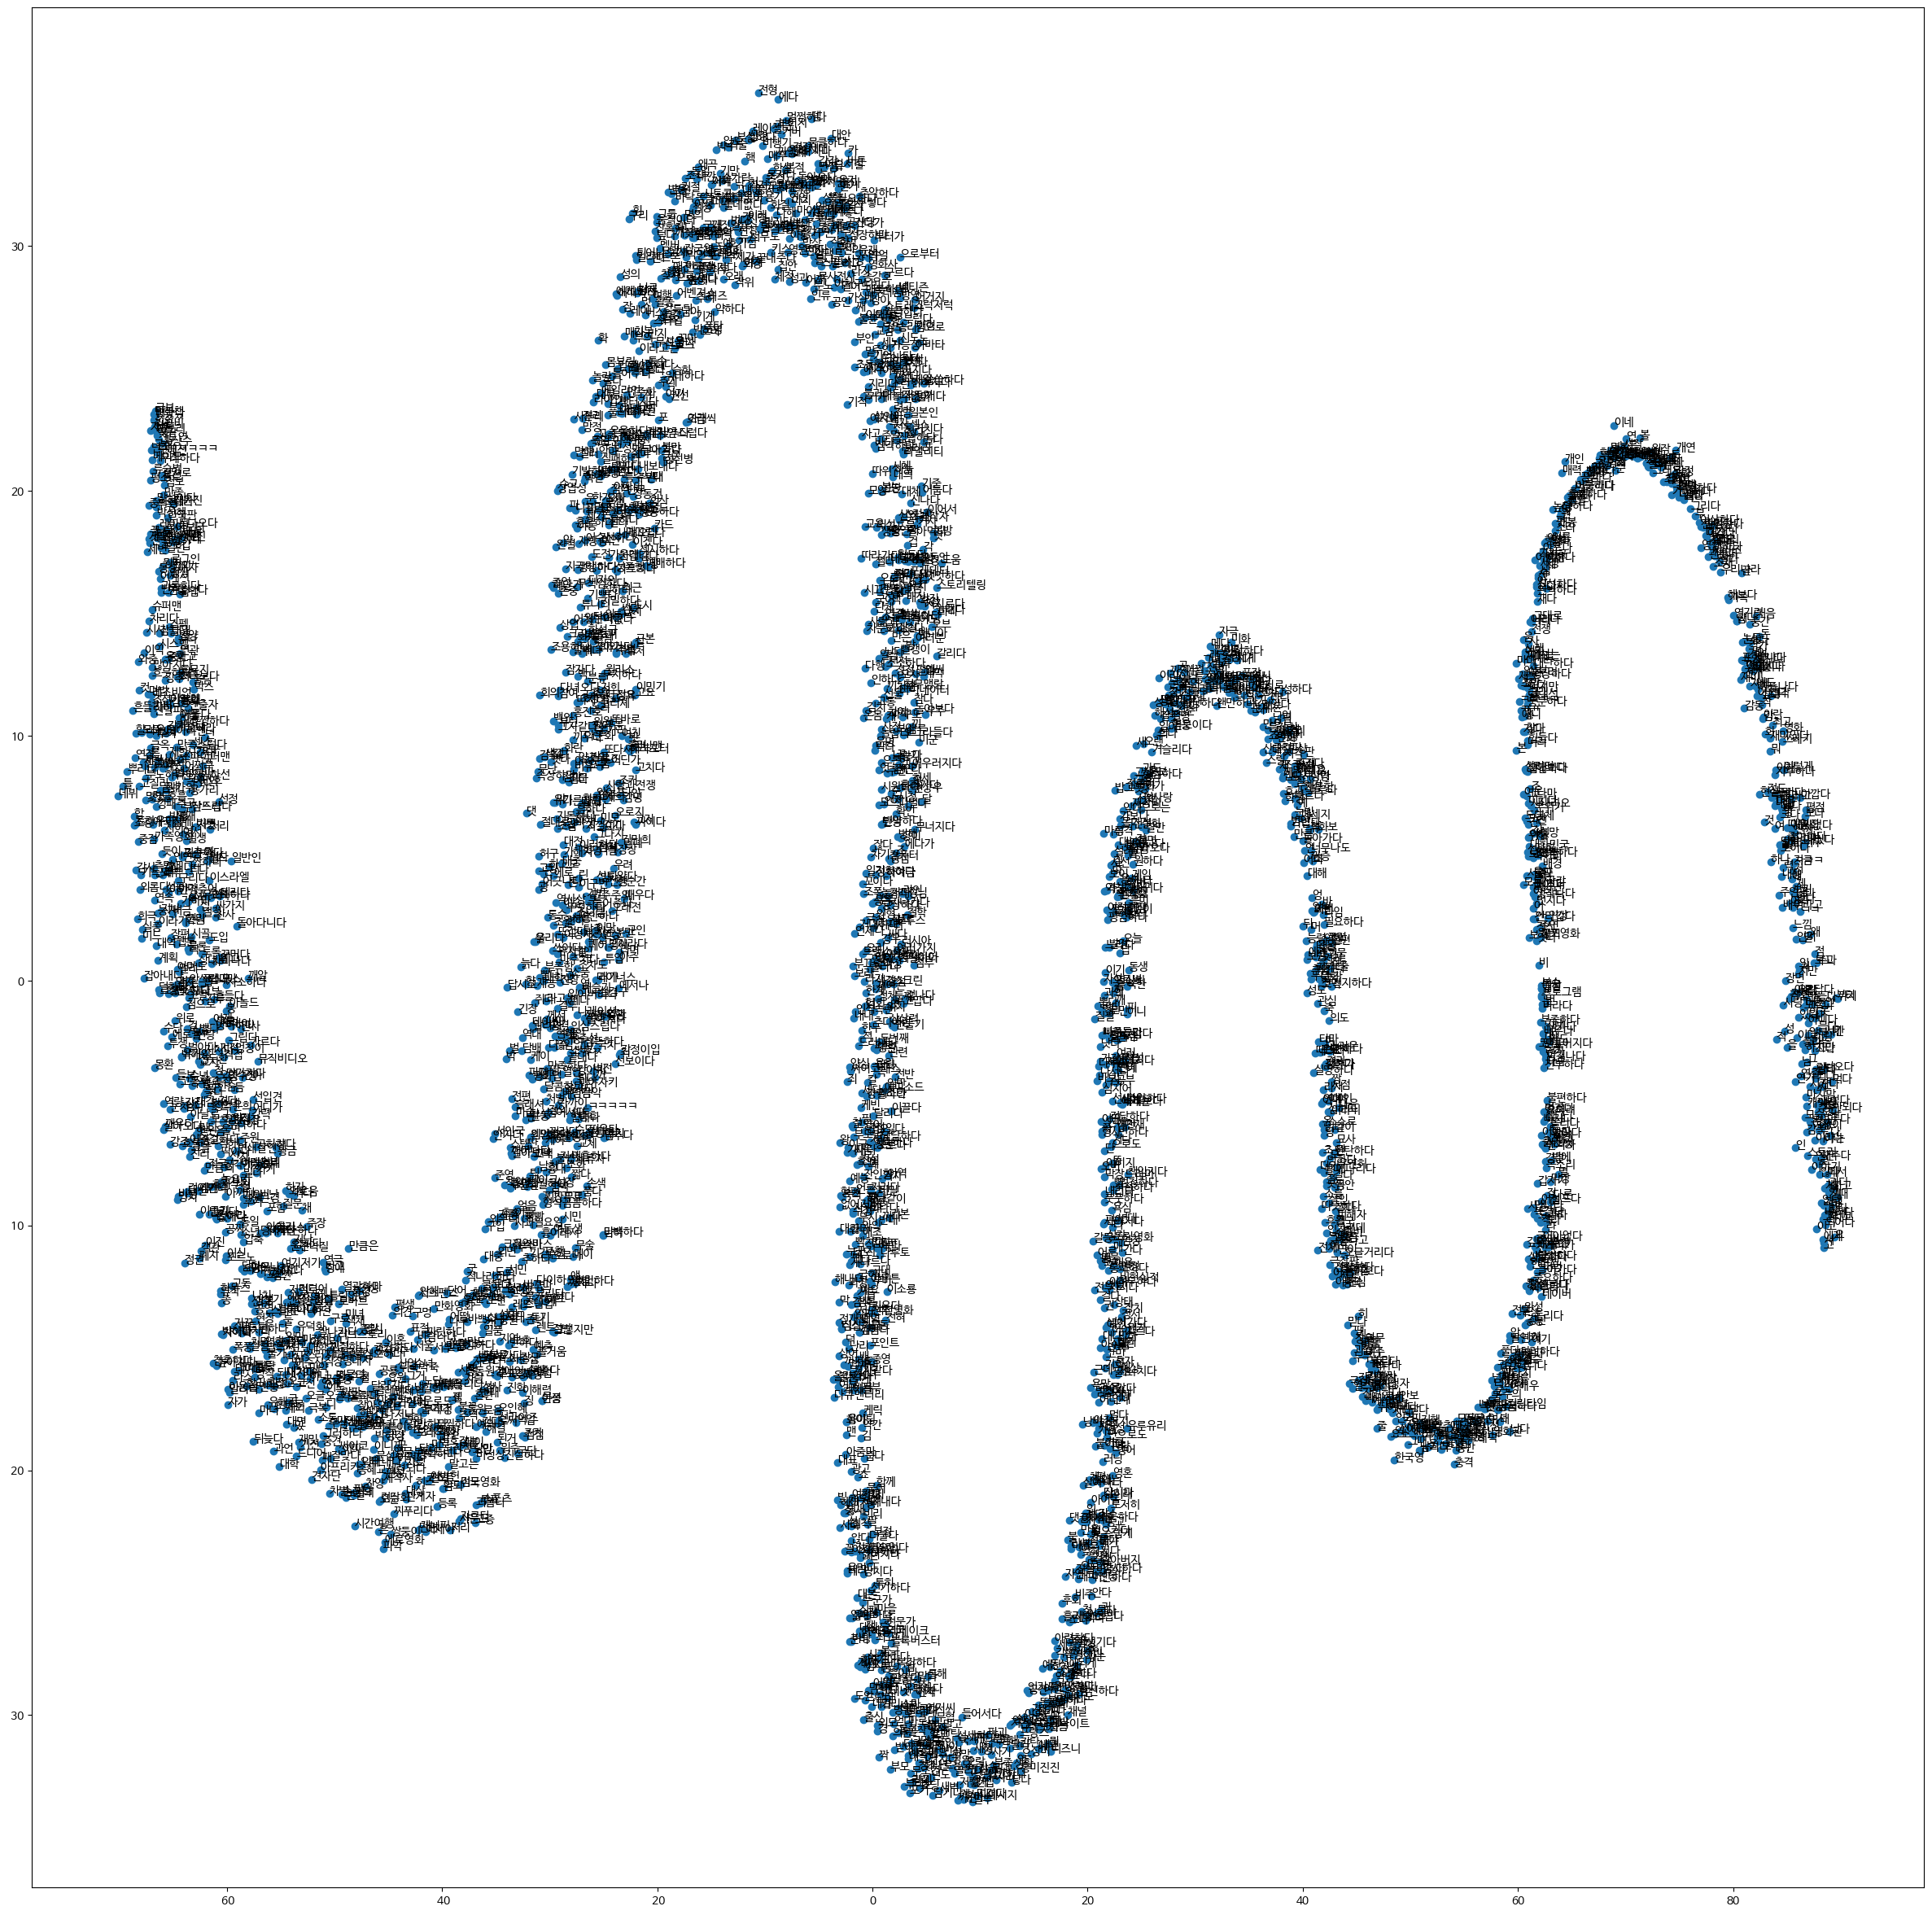

In [35]:
plot_tsne_graph(vocabs, x_axis_tsne, y_axis_tsne)

# 5. TSNE 고도화
* Python에서 제공하는 interactive visualization library인 [bokeh](https://docs.bokeh.org/en/latest/)를 사용하여 시각화 고도화

In [36]:
import pickle

In [37]:
tsne_df = pd.DataFrame(transformed, columns=['x_coord', 'y_coord'])

In [38]:
tsne_df

,x_coord,y_coord
0,84.674370,10.208585
1,86.670563,6.721364
2,84.994453,-2.732892
3,85.923256,-2.347337
4,86.055923,-1.497891
...,...,...
3132,-26.572042,-1.688534
3133,-64.565117,-0.133292
3134,-57.895824,-15.042150
3135,-67.074074,18.254053


In [45]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

In [46]:
output_notebook()

In [64]:
# prepare the data in a form suitable for bokeh.
plot_data = ColumnDataSource(tsne_df)
# create the plot and configure it
tsne_plot = figure(title='t-SNE Word Embeddings',
  plot_width = 800,
  plot_height = 800,
  active_scroll='wheel_zoom'
)
# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
tsne_plot.circle(
    'x_coord', 'y_coord', source=plot_data,
    color='red', line_alpha=0.2, fill_alpha=0.1,
    size=10, hover_line_color='orange'
  )
# adjust visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None
# show time!
show(tsne_plot);

In [53]:
from gensim.models import KeyedVectors

In [54]:
model.wv.save_word2vec_format('sample_word2vec_embedding')

In [55]:
!python -m gensim.scripts.word2vec2tensor --input sample_word2vec_embedding --output sample_word2vec_embedding

2023-07-05 04:56:32,891 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py --input sample_word2vec_embedding --output sample_word2vec_embedding
2023-07-05 04:56:32,891 - keyedvectors - INFO - loading projection weights from sample_word2vec_embedding
2023-07-05 04:56:33,138 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (3137, 100) matrix of type float32 from sample_word2vec_embedding', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-07-05T04:56:33.137241', 'gensim': '4.3.1', 'python': '3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]', 'platform': 'Linux-5.15.107+-x86_64-with-glibc2.31', 'event': 'load_word2vec_format'}
2023-07-05 04:56:33,394 - word2vec2tensor - INFO - 2D tensor file saved to sample_word2vec_embedding_tensor.tsv
2023-07-05 04:56:33,395 - word2vec2tensor - INFO - Tensor metadata file saved to sample_word2vec_embedding_metadata.tsv
2023-07-05 04:56:33,395 - word2vec2tensor - INFO - finished